<a href="https://colab.research.google.com/github/OneNameSam/mlzoomcamp_work/blob/main/Week_2_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [41]:
#!wget 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'

In [42]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [43]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

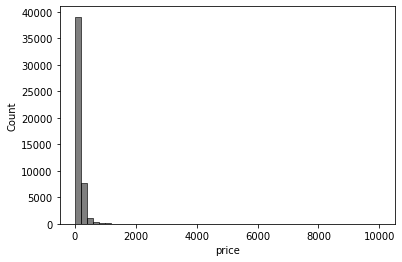

In [44]:
sns.histplot(df.price, color = 'black', alpha =0.5, bins=50)

#Long tail so need to normalise price 

Text(0.5, 1.0, 'Distribution of prices')

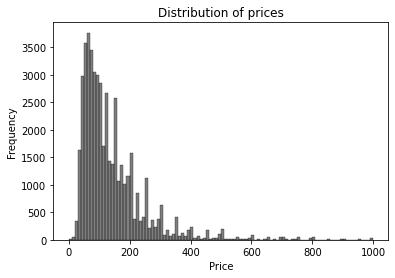

In [45]:
sns.histplot(df.price[df.price< 1000], color = 'black', alpha =0.5, bins=100)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

#Long tail so need to normalise price 

In [46]:
df_focused = df[['latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']]

df_focused.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


### Question 1 

In [47]:
df_focused.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Question 2 

In [48]:
df_focused.minimum_nights.median()

3.0

In [49]:
n = len(df_focused)
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
n

48895

In [50]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)

In [51]:
n_train + n_test + n_val

48895

In [52]:
df_val = df_focused.iloc[idx[:n_val]]
df_test = df_focused.iloc[idx[n_val:(n_val+n_test)]]
df_train = df_focused.iloc[idx[(n_val+n_test):]]
df_train

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1261,40.72006,-73.99579,58,6,18,0.21,1,0
19170,40.68048,-73.99322,130,4,8,0.24,1,0
45159,40.75933,-73.98751,164,29,0,NaN,327,336
9085,40.67886,-73.96802,164,1,2,0.04,1,0
20490,40.72087,-73.98079,300,1,2,0.15,1,0
...,...,...,...,...,...,...,...,...
11284,40.84650,-73.94319,60,1,0,NaN,1,0
44732,40.73957,-74.00082,85,2,4,1.90,1,76
38158,40.78318,-73.97372,130,30,1,0.34,5,261
860,40.77508,-73.97990,150,2,11,0.13,1,2


In [53]:
df_val = df_val.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [54]:
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)
y_train = np.log1p(df_train.price.values)
y_train

array([4.07753744, 4.87519732, 5.10594547, ..., 4.87519732, 5.01727984,
       4.79579055])

In [55]:
del df_train['price']
del df_val['price']
del df_test['price']

### Question 3


In [56]:
def prepare_X(df, value=0):
  df_num = df.fillna(value)
  X= df_num.values
  return X

In [57]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [58]:
def rmse(y, y_pred):
  error = y-y_pred
  se = error **2 
  mse = se.mean()
  return round(np.sqrt(mse),2)

Training Models 

In [59]:
X_train = prepare_X(df_train, value=0)
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w) 
rmse(y_train, y_pred)

0.65

In [60]:
mean = df_train.reviews_per_month.mean()

X_train = prepare_X(df_train, value=mean)

w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w) 
rmse(y_train, y_pred)

0.65

using the mean to replace missing values is slightly better for training the mode

### Question 4 

In [61]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [62]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
  X_train = prepare_X(df_train)
  w0, w = train_linear_regression_reg(X_train, y_train, r = r)

  y_pred = w0 + X_train.dot(w)

  score = rmse(y_train, y_pred)
  print (r , w0, score )

0 -440.3826961845784 0.65
1e-06 -440.3291441288488 0.65
0.0001 -435.09119702853843 0.65
0.001 -392.6315505370462 0.65
0.01 -198.7119264267754 0.66
0.1 -33.45785655852209 0.68
1 -3.590056230757279 0.69
5 -0.721592410718433 0.69
10 -0.36041879534433474 0.69


Best r value bases on the rmse is 0.000001

### Question 5 

In [63]:
n = len(df_focused)

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]: 
  idx = np.arange(n)
  np.random.seed(seed)
  np.random.shuffle(idx)

  df_val = df_focused.iloc[idx[:n_val]]
  df_test = df_focused.iloc[idx[n_val:(n_val+n_test)]]
  df_train = df_focused.iloc[idx[(n_val+n_test):]]

  df_val = df_val.reset_index(drop=True)
  df_train = df_train.reset_index(drop=True)
  df_test = df_test.reset_index(drop=True)

  y_val = np.log1p(df_val.price.values)
  y_test = np.log1p(df_test.price.values)
  y_train = np.log1p(df_train.price.values)

  del df_train['price']
  del df_val['price']
  del df_test['price']

  X_train = prepare_X(df_train)

  r = 0.000001
  w0, w = train_linear_regression_reg(X_train, y_train, r = r)

  X_val = prepare_X(df_val)
  y_pred = w0 + X_val.dot(w)

  std_array = pd.DataFrame()

  score = rmse(y_val, y_pred)

  std = round(np.std(y_pred),3)

  print(score)
  #print (seed ,r, w0, score, std)


0.65
0.64
0.65
0.65
0.63
0.66
0.65
0.64
0.64
0.65


In [64]:
scores =np.array([0.65,
0.64,
0.65,
0.65,
0.63,
0.66,
0.65,
0.64,
0.64,
0.65])

round(np.std(scores),3)

0.008

#### Question 6 

In [65]:
seed = 9 
idx = np.arange(n)
np.random.seed(seed)
np.random.shuffle(idx)

df_val = df_focused.iloc[idx[:n_val]]
df_test = df_focused.iloc[idx[n_val:(n_val+n_test)]]
df_train = df_focused.iloc[idx[(n_val+n_test):]]

df_val = df_val.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)
y_train = np.log1p(df_train.price.values)

del df_train['price']
del df_val['price']
del df_test['price']

df_full_train = pd.concat([df_train, df_val])

df_full_train.reset_index(drop=True)

y_full_train = np.concatenate([y_train, y_val])

X_full_train = prepare_X(df_full_train)

r = 0.001
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r = r)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

score = rmse(y_val, y_pred)
std = round(np.std(y_pred),3)

print (seed ,r, w0, score, std)
print (score)

9 0.001 -385.5858111031472 0.74 0.24
0.74
